In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor


In [54]:
!pip install xgboost

In [55]:
from xgboost import XGBRegressor

Importing the Dataset

In [56]:
df = pd.read_csv('4S4P_Charging_and_Discharging_Normalized.csv')

In [57]:
df.head()

,T0,SOC,Voltage_V,Current_A,C,T1,Charge_or_Discharge
0,1.000000,0.057573,0.338843,0.310342,0.2,0.934638,1
1,0.666667,0.611615,0.628176,0.310342,0.2,0.582159,1
2,0.500000,0.942161,0.993906,0.137919,0.0,0.422739,0
3,0.333333,0.482339,0.609832,0.310342,0.2,0.401226,1
4,0.500000,0.971267,0.997626,0.078381,0.0,0.423606,0


In [58]:
#Checking the number of rows and columns
df.shape
#checking missing values
df.isnull().sum()

T0                     0
SOC                    0
Voltage_V              0
Current_A              0
C                      0
T1                     0
Charge_or_Discharge    0
dtype: int64

In [59]:
df.describe()

,T0,SOC,Voltage_V,Current_A,C,T1,Charge_or_Discharge
count,45500.000000,45500.000000,45500.000000,45500.000000,45500.000000,45500.000000,45500.000000
mean,0.434491,0.548515,0.792887,0.276603,0.194114,0.432715,0.363758
std,0.230300,0.299238,0.245595,0.208296,0.226115,0.172572,0.481086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.292570,0.597054,0.137917,0.000000,0.328723,0.000000
50%,0.333333,0.565602,0.929334,0.224123,0.200000,0.401939,0.000000
75%,0.500000,0.816347,0.997596,0.310342,0.200000,0.474713,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Understanding the correlation between features in the dataset
1. Positive Correlation
2. Negative Correlation

In [60]:
df_corr_matrix = df.corr()

<Axes: >

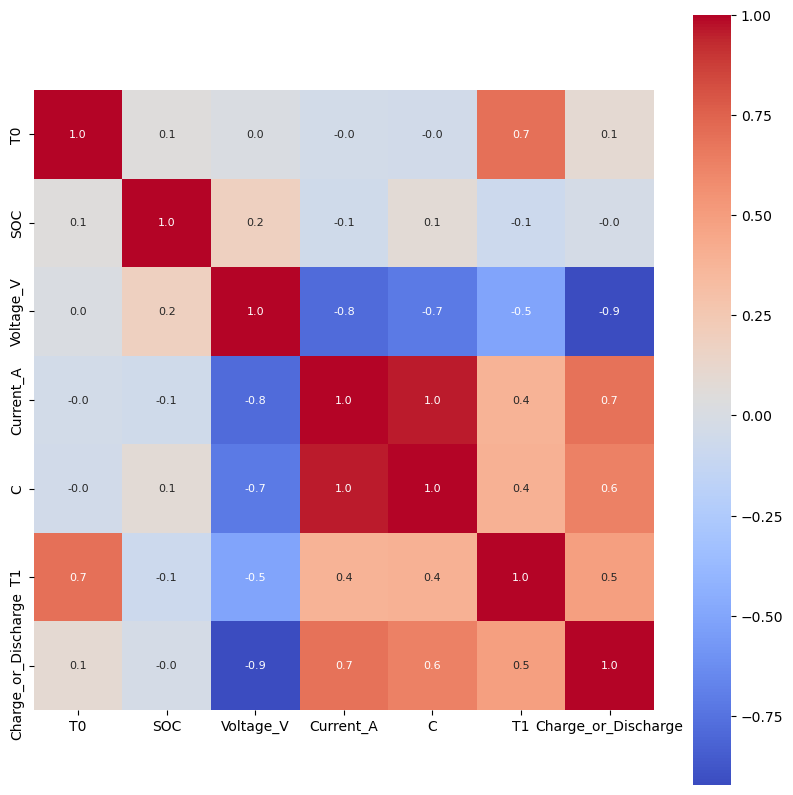

In [61]:
plt.figure(figsize=(10,10))
sns.heatmap(df_corr_matrix,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='coolwarm')

Splitting the Data and Target

In [62]:
df.head()

,T0,SOC,Voltage_V,Current_A,C,T1,Charge_or_Discharge
0,1.000000,0.057573,0.338843,0.310342,0.2,0.934638,1
1,0.666667,0.611615,0.628176,0.310342,0.2,0.582159,1
2,0.500000,0.942161,0.993906,0.137919,0.0,0.422739,0
3,0.333333,0.482339,0.609832,0.310342,0.2,0.401226,1
4,0.500000,0.971267,0.997626,0.078381,0.0,0.423606,0


In [63]:
X = df.drop(columns=['T1'])
Y = df['T1']

In [64]:
X.head()

,T0,SOC,Voltage_V,Current_A,C,Charge_or_Discharge
0,1.000000,0.057573,0.338843,0.310342,0.2,1
1,0.666667,0.611615,0.628176,0.310342,0.2,1
2,0.500000,0.942161,0.993906,0.137919,0.0,0
3,0.333333,0.482339,0.609832,0.310342,0.2,1
4,0.500000,0.971267,0.997626,0.078381,0.0,0


Splitting the Data into Training data and Test data

In [65]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state=42)

In [66]:
print(X.shape,X_train.shape,X_test.shape)

(45500, 6) (36400, 6) (9100, 6)


Model Training

1.XGBoost Regressor

In [67]:
#loading the models
model = XGBRegressor()

In [68]:
#training the model with X_trian
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

Evaluation

Prediction on training data

In [69]:
#accuracy for prediction on training data
training_data_prediction = model.predict(X_train)

In [70]:
print(training_data_prediction)

[0.29073802 0.42411545 0.24843161 ... 0.41470057 0.32942998 0.67720294]


In [149]:
#R squared error
r2_1 = metrics.r2_score(Y_train,training_data_prediction)

#Mean absolute error
mse_1 = metrics.mean_absolute_error(Y_train,training_data_prediction)
print("R squared error : ",r2_1)
print("Mean absolute error : ",mse_1)

R squared error :  0.9999190968426579
Mean absolute error :  0.0009273945932999726


Prediction on Test Data

In [72]:
#accuracy for predictions on test data
test_data_predictions = model.predict(X_test)

In [142]:
#R squared error
r2_1 = metrics.r2_score(Y_test,test_data_predictions)

#Mean absolute error
mse_1 = metrics.mean_absolute_error(Y_test,test_data_predictions)
print("R squared error : ",r2_1)
print("Mean absolute error : ",mse_1)

R squared error :  0.9998817859628861
Mean absolute error :  0.0010413660364066077


Visualizing the actual temperature and predicted temperature

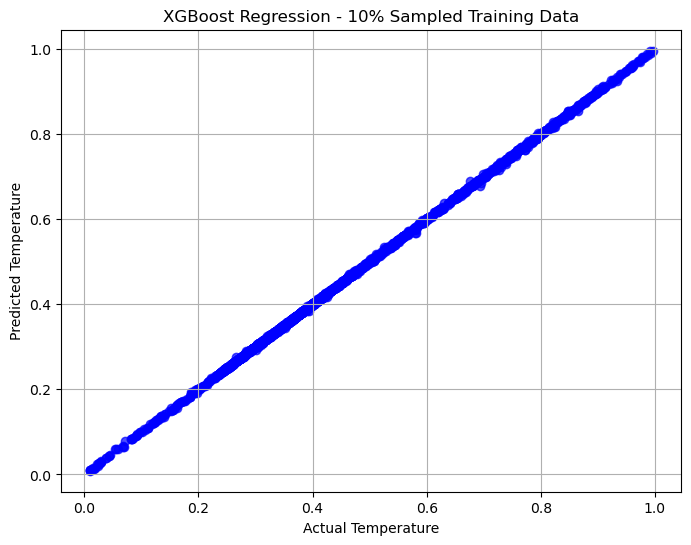

In [74]:

Y_train1 = np.array(Y_train)
training_data_prediction1 = np.array(training_data_prediction)

# Check if both arrays are the same length
assert len(Y_train1) == len(training_data_prediction1), "Y_train and predictions must be same length"

# Sample 10% of data
n_samples1 = int(0.1 * len(Y_train1))
if n_samples1 < 1:
    n_samples1 = 1  # Ensure at least one point is selected

indices = np.random.choice(len(Y_train1), n_samples1, replace=False)

# Get 10% sampled data
Y_sample1 = Y_train1[indices]
prediction_sample1 = training_data_prediction1[indices]

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(Y_sample1, prediction_sample1, color='blue', alpha=0.7)
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.title("XGBoost Regression - 10% Sampled Training Data")
plt.grid(True)
plt.show()

In [163]:
nd = pd.read_csv('newdata.csv')

In [164]:
# Drop 'T1' if it's the target (temperature to predict)
X_new = nd.drop(columns=['T1']).values  # 2D array, shape = (6, 6)

# Predict using your trained model
predicted_temperature_xgb= model.predict(X_new)

# Show the predictions
print("Predicted Temperatures:")
for i, temp in enumerate(predicted_temperature_xgb):
    print(f"Sample {i+1}: {temp:.2f}°C")


Predicted Temperatures:
Sample 1: 0.49°C
Sample 2: 0.39°C
Sample 3: 0.77°C
Sample 4: 0.48°C
Sample 5: 0.32°C
Sample 6: 0.42°C


In [165]:
# Convert predictions into a DataFrame
predicted_df = pd.DataFrame(predicted_temperature_xgb, columns=['Predicted_Temperature'])

# Concatenate the original dataset with the predicted values
nd_with_predictions = pd.concat([nd, predicted_df], axis=1)



In [128]:
nd_with_predictions

,T0,SOC,Voltage_V,Current_A,C,T1,Charge_or_Discharge,Predicted_Temperature
0,0.500000,0.979065,0.997596,0.046844,0.3,0.489063,0,0.488815
1,0.500000,0.418433,0.990806,0.224132,0.6,0.409451,0,0.393093
2,0.333333,0.159975,0.322526,0.655171,0.4,0.773863,1,0.772144
3,0.500000,0.949851,0.997626,0.129736,0.7,0.422936,0,0.478376
4,0.333333,0.786039,0.628554,0.310342,0.9,0.319638,1,0.321766
5,0.500000,0.855590,0.958051,0.137919,0.0,0.420544,0,0.420347


2.Decision Tree Regressor

In [79]:
model_2=DecisionTreeRegressor()

In [80]:
model_2.fit(X_train,Y_train)

DecisionTreeRegressor()

Evaluation

In [81]:
#accuracy for prediction on training data
training_data_prediction_2 = model_2.predict(X_train)

In [156]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#R squared error
r2_2 = metrics.r2_score(Y_train,training_data_prediction_2)

#Mean absolute error
mse_2 = metrics.mean_squared_error(Y_train, training_data_prediction_2)
print("R squared error : ",r2_2)
print("Mean squared error : ",mse_2)

R squared error :  0.9999999976017613
Mean squared error :  7.070033602384242e-11


Visualizing the actual temperature and predicted temperature

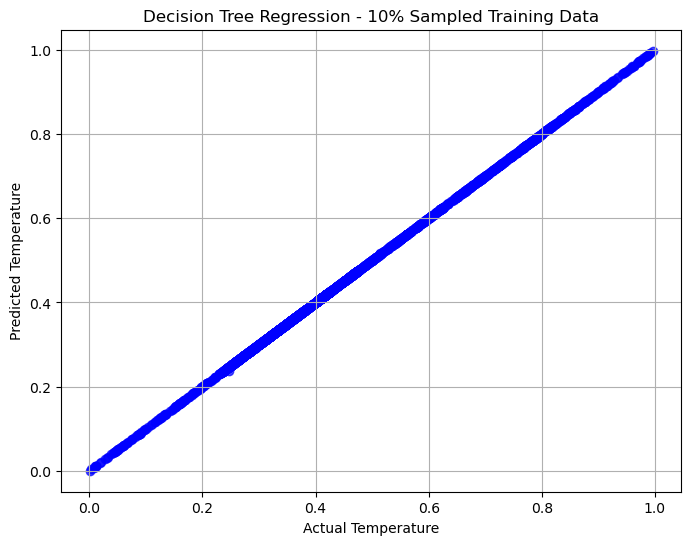

In [83]:
Y_train2 = np.array(Y_train)
training_data_prediction2 = np.array(training_data_prediction_2)

# Check if both arrays are the same length
assert len(Y_train2) == len(training_data_prediction2), "Y_train and predictions must be same length"

# Sample 10% of data
n_samples2 = int(0.1 * len(Y_train2))
if n_samples2 < 1:
    n_samples2 = 1  # Ensure at least one point is selected

indices = np.random.choice(len(Y_train2), n_samples2, replace=False)

# Get 10% sampled data
Y_sample2 = Y_train2[indices]
prediction_sample2 = training_data_prediction2[indices]

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(Y_sample5, prediction_sample5, color='blue', alpha=0.7)
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.title("Decision Tree Regression - 10% Sampled Training Data")
plt.grid(True)
plt.show()

In [166]:
# Drop 'T1' if it's the target (temperature to predict)
X_new = nd.drop(columns=['T1']).values  # 2D array, shape = (6, 6)

# Predict using your trained model
predicted_temperature_dt = model_2.predict(X_new)

# Show the predictions
print("Predicted Temperatures:")
for i, temp in enumerate(predicted_temperature_dt):
    print(f"Sample {i+1}: {temp:.2f}°C")


Predicted Temperatures:
Sample 1: 0.49°C
Sample 2: 0.41°C
Sample 3: 0.77°C
Sample 4: 0.48°C
Sample 5: 0.32°C
Sample 6: 0.42°C


C:\Users\a2nya\desktop\sample_project_1\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [133]:
# Convert predictions into a DataFrame
predicted_df_2 = pd.DataFrame(predicted_temperature_dt, columns=['Predicted_Temperature'])

# Concatenate the original dataset with the predicted values
nd_with_predictions_2 = pd.concat([nd, predicted_df_2], axis=1)
nd_with_predictions_2

,T0,SOC,Voltage_V,Current_A,C,T1,Charge_or_Discharge,Predicted_Temperature
0,0.500000,0.979065,0.997596,0.046844,0.3,0.489063,0,0.489063
1,0.500000,0.418433,0.990806,0.224132,0.6,0.409451,0,0.409451
2,0.333333,0.159975,0.322526,0.655171,0.4,0.773863,1,0.773863
3,0.500000,0.949851,0.997626,0.129736,0.7,0.422936,0,0.477804
4,0.333333,0.786039,0.628554,0.310342,0.9,0.319638,1,0.319638
5,0.500000,0.855590,0.958051,0.137919,0.0,0.420544,0,0.420544


Random Forest Regression

In [84]:
model_3 = RandomForestRegressor(n_estimators = 10, random_state = 0)

In [85]:
model_3.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [86]:
#accuracy for prediction on training data
training_data_prediction_3 = model_3.predict(X_train)

In [143]:
from sklearn.metrics import mean_squared_error
#R squared error
r2_3 = metrics.r2_score(Y_train,training_data_prediction_3)

#Mean absolute error
mse_3 = metrics.mean_squared_error(Y_train, training_data_prediction_3)
print("R squared error : ",r2_3)
print("Mean squared error : ",mse_3)

R squared error :  0.9999913110188875
Mean squared error :  2.561521023412148e-07


Visualizing the actual temperature and predicted temperature

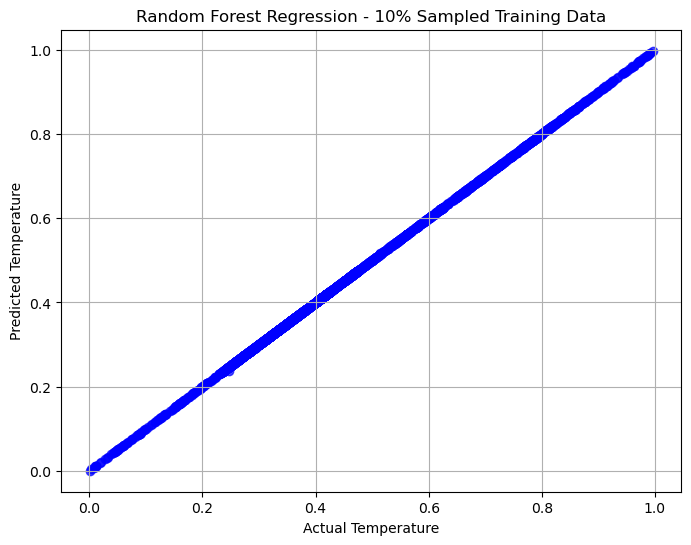

In [88]:
Y_train3 = np.array(Y_train)
training_data_prediction3 = np.array(training_data_prediction_3)

# Check if both arrays are the same length
assert len(Y_train3) == len(training_data_prediction3), "Y_train and predictions must be same length"

# Sample 10% of data
n_samples3 = int(0.1 * len(Y_train3))
if n_samples3 < 1:
    n_samples3 = 1  # Ensure at least one point is selected

indices = np.random.choice(len(Y_train3), n_samples3, replace=False)

# Get 10% sampled data
Y_sample3 = Y_train3[indices]
prediction_sample3 = training_data_prediction3[indices]

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(Y_sample5, prediction_sample5, color='blue', alpha=0.7)
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.title("Random Forest Regression - 10% Sampled Training Data")
plt.grid(True)
plt.show()

In [134]:
# Drop 'T1' if it's the target (temperature to predict)
X_new = nd.drop(columns=['T1']).values  # 2D array, shape = (6, 6)

# Predict using your trained model
predicted_temperature_rfg = model_3.predict(X_new)

# Show the predictions
print("Predicted Temperatures:")
for i, temp in enumerate(predicted_temperature_rfg):
    print(f"Sample {i+1}: {temp:.2f}°C")


Predicted Temperatures:
Sample 1: 0.49°C
Sample 2: 0.41°C
Sample 3: 0.68°C
Sample 4: 0.48°C
Sample 5: 0.32°C
Sample 6: 0.42°C


C:\Users\a2nya\desktop\sample_project_1\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [144]:
# Convert predictions into a DataFrame
predicted_df_3 = pd.DataFrame(predicted_temperature_rfg, columns=['Predicted_Temperature'])

# Concatenate the original dataset with the predicted values
nd_with_predictions_3 = pd.concat([nd, predicted_df_3], axis=1)
nd_with_predictions_3

,T0,SOC,Voltage_V,Current_A,C,T1,Charge_or_Discharge,Predicted_Temperature
0,0.500000,0.979065,0.997596,0.046844,0.3,0.489063,0,0.489063
1,0.500000,0.418433,0.990806,0.224132,0.6,0.409451,0,0.408880
2,0.333333,0.159975,0.322526,0.655171,0.4,0.773863,1,0.684289
3,0.500000,0.949851,0.997626,0.129736,0.7,0.422936,0,0.477304
4,0.333333,0.786039,0.628554,0.310342,0.9,0.319638,1,0.319663
5,0.500000,0.855590,0.958051,0.137919,0.0,0.420544,0,0.420544


In [89]:
model_4= LinearRegression()

In [90]:
model_4.fit(X_train,Y_train)

LinearRegression()

In [91]:
#accuracy for prediction on training data
training_data_prediction_4 = model_4.predict(X_train)

In [154]:
from sklearn.metrics import mean_squared_error
#R squared error
r2_4 = metrics.r2_score(Y_train,training_data_prediction_4)

#Mean absolute error
mse_4 = metrics.mean_squared_error(Y_train, training_data_prediction_4)
print("R squared error : ",r2_4)
print("Mean squared error : ",mse_4)

R squared error :  0.8049730865365143
Mean squared error :  0.005749414488268585


In [93]:
print("Weights (Coefficients):", model_4.coef_)
print("Bias (Intercept):", model_4.intercept_)

Weights (Coefficients): [ 0.55858096 -0.0434215  -0.5954292  -0.63749899  0.57822418 -0.10926253]
Bias (Intercept): 0.7897067253450544


Visualizing the actual temperature and predicted temperature

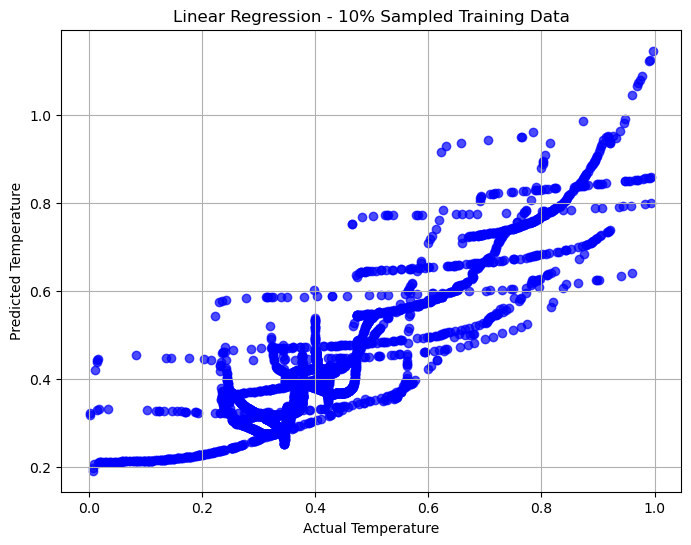

In [94]:

Y_train4 = np.array(Y_train)
training_data_prediction4 = np.array(training_data_prediction_4)

# Check if both arrays are the same length
assert len(Y_train4) == len(training_data_prediction4), "Y_train and predictions must be same length"

# Sample 10% of data
n_samples4 = int(0.1 * len(Y_train4))
if n_samples4 < 1:
    n_samples4 = 1  # Ensure at least one point is selected

indices = np.random.choice(len(Y_train4), n_samples4, replace=False)

# Get 10% sampled data
Y_sample4 = Y_train4[indices]
prediction_sample4 = training_data_prediction4[indices]

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(Y_sample4, prediction_sample4, color='blue', alpha=0.7)
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.title("Linear Regression - 10% Sampled Training Data")
plt.grid(True)
plt.show()

In [95]:

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
# Define the GridSearchCV
grid_search = GridSearchCV(estimator=model_3, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, Y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}


In [137]:
# Drop 'T1' if it's the target (temperature to predict)
X_new = nd.drop(columns=['T1']).values  # 2D array, shape = (6, 6)

# Predict using your trained model
predicted_temperature_lr = model_4.predict(X_new)

# Show the predictions
print("Predicted Temperatures:")
for i, temp in enumerate(predicted_temperature_lr):
    print(f"Sample {i+1}: {temp:.2f}°C")


Predicted Temperatures:
Sample 1: 0.58°C
Sample 2: 0.66°C
Sample 3: 0.48°C
Sample 4: 0.76°C
Sample 5: 0.78°C
Sample 6: 0.37°C


C:\Users\a2nya\desktop\sample_project_1\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [138]:
# Convert predictions into a DataFrame
predicted_df_4= pd.DataFrame(predicted_temperature_lr, columns=['Predicted_Temperature'])

# Concatenate the original dataset with the predicted values
nd_with_predictions_4 = pd.concat([nd, predicted_df_4], axis=1)
nd_with_predictions_4

,T0,SOC,Voltage_V,Current_A,C,T1,Charge_or_Discharge,Predicted_Temperature
0,0.500000,0.979065,0.997596,0.046844,0.3,0.489063,0,0.576092
1,0.500000,0.418433,0.990806,0.224132,0.6,0.409451,0,0.664924
2,0.333333,0.159975,0.322526,0.655171,0.4,0.773863,1,0.481269
3,0.500000,0.949851,0.997626,0.129736,0.7,0.422936,0,0.755788
4,0.333333,0.786039,0.628554,0.310342,0.9,0.319638,1,0.780807
5,0.500000,0.855590,0.958051,0.137919,0.0,0.420544,0,0.373472


In [96]:
model_5  = KNeighborsRegressor(n_neighbors=3)

In [97]:
model_5.fit(X_train,Y_train)

KNeighborsRegressor(n_neighbors=3)

In [98]:
#accuracy for prediction on training data
training_data_prediction_5 = model_5.predict(X_train)

In [145]:
from sklearn.metrics import mean_squared_error
#R squared error
r2_5 = metrics.r2_score(Y_train,training_data_prediction_5)

#Mean absolute error
mse_5 = metrics.mean_squared_error(Y_train, training_data_prediction_5)
print("R squared error : ",r2_5)
print("Mean squared error : ",mse_5)

R squared error :  0.9999960085074826
Mean squared error :  1.1766963083214231e-07


Visualizing the actual temperature and predicted temperature

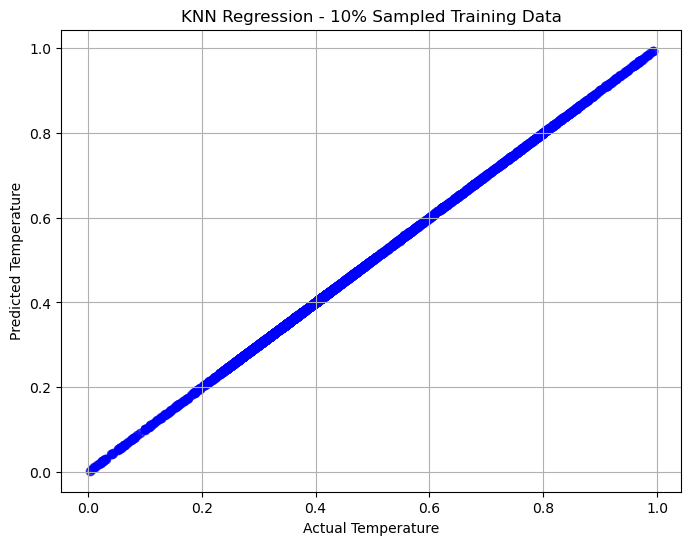

In [100]:
Y_train5 = np.array(Y_train)
training_data_prediction5 = np.array(training_data_prediction_5)

# Check if both arrays are the same length
assert len(Y_train5) == len(training_data_prediction5), "Y_train and predictions must be same length"

# Sample 10% of data
n_samples5 = int(0.1 * len(Y_train5))
if n_samples5 < 1:
    n_samples5 = 1  # Ensure at least one point is selected

indices = np.random.choice(len(Y_train5), n_samples5, replace=False)

# Get 10% sampled data
Y_sample5 = Y_train5[indices]
prediction_sample5 = training_data_prediction5[indices]

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(Y_sample5, prediction_sample5, color='blue', alpha=0.7)
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.title("KNN Regression - 10% Sampled Training Data")
plt.grid(True)
plt.show()

In [103]:
nd = pd.read_csv('newdata.csv')

In [139]:
# Drop 'T1' if it's the target (temperature to predict)
X_new = nd.drop(columns=['T1']).values  # 2D array, shape = (6, 6)

# Predict using your trained model
predicted_temperature_knn = model_5.predict(X_new)

# Show the predictions
print("Predicted Temperatures:")
for i, temp in enumerate(predicted_temperature_knn):
    print(f"Sample {i+1}: {temp:.2f}°C")


Predicted Temperatures:
Sample 1: 0.49°C
Sample 2: 0.39°C
Sample 3: 0.77°C
Sample 4: 0.48°C
Sample 5: 0.39°C
Sample 6: 0.42°C


C:\Users\a2nya\desktop\sample_project_1\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


In [140]:
# Convert predictions into a DataFrame
predicted_df_5= pd.DataFrame(predicted_temperature_knn, columns=['Predicted_Temperature'])

# Concatenate the original dataset with the predicted values
nd_with_predictions_5= pd.concat([nd, predicted_df_5], axis=1)
nd_with_predictions_5

,T0,SOC,Voltage_V,Current_A,C,T1,Charge_or_Discharge,Predicted_Temperature
0,0.500000,0.979065,0.997596,0.046844,0.3,0.489063,0,0.489063
1,0.500000,0.418433,0.990806,0.224132,0.6,0.409451,0,0.389196
2,0.333333,0.159975,0.322526,0.655171,0.4,0.773863,1,0.773841
3,0.500000,0.949851,0.997626,0.129736,0.7,0.422936,0,0.476759
4,0.333333,0.786039,0.628554,0.310342,0.9,0.319638,1,0.391976
5,0.500000,0.855590,0.958051,0.137919,0.0,0.420544,0,0.420547


In [157]:


# Create a dictionary with stored R² and MSE values
model_results = {
    'model': {'R2': r2_1, 'MSE': mse_1},
    'model_2': {'R2': r2_2, 'MSE': mse_2},
    'model_3': {'R2': r2_3, 'MSE': mse_3},
    'model_4': {'R2': r2_4, 'MSE': mse_4},
    'model_5': {'R2': r2_5, 'MSE': mse_5},
}

df_results = pd.DataFrame(model_results).T

# Find the best model based on highest R² and lowest MSE
best_model_r2 = df_results.idxmax()['R2']  
best_model_mse = df_results.idxmin()['MSE']  

# Display results
print("Model Performance Metrics:")
print(df_results)

print(f"\nBest model based on R² (highest accuracy): {best_model_r2}")
print(f"Best model based on MSE (lowest error): {best_model_mse}")


Model Performance Metrics:
               R2           MSE
model    0.999919  9.273946e-04
model_2  1.000000  7.070034e-11
model_3  0.999991  2.561521e-07
model_4  0.804973  5.749414e-03
model_5  0.999996  1.176696e-07

Best model based on R² (highest accuracy): model_2
Best model based on MSE (lowest error): model_2
